<a href="https://colab.research.google.com/github/tejeshvarsk/tensors/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor());

100%|██████████| 26421880/26421880 [00:02<00:00, 11144032.54it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202778.88it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3802822.67it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11528177.79it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor() )

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

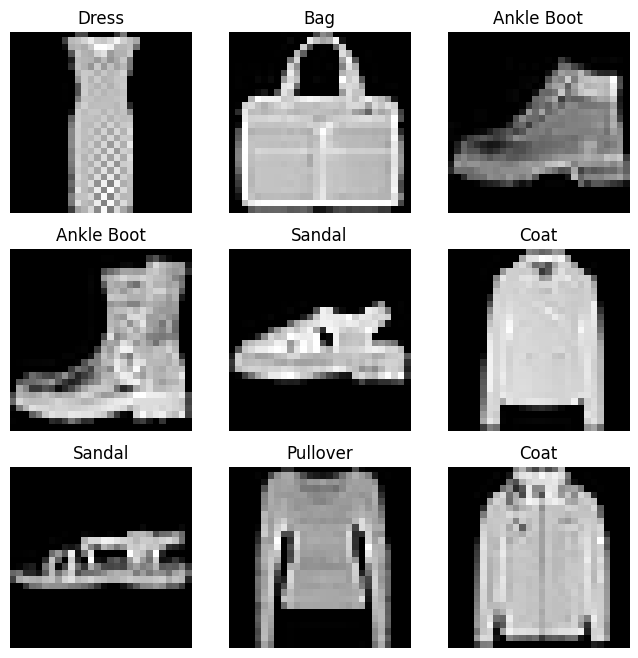

In [6]:
figure = plt.figure(figsize=(8,8))
cols,rows=3,3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i )
  plt.axis("off")
  plt.title(labels_map[label])
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


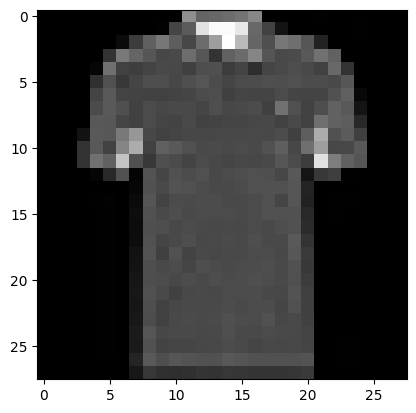

Label : T-Shirt


In [25]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.shape}")
print(f"Labels batch shape : {train_labels.shape}")
img = train_features[0]
label=train_labels[0]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print(f"Label : {labels_map[label.item()] }")

In [24]:
label.item()

9